<a href="https://colab.research.google.com/github/hm06063/hihi/blob/master/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

클러스터링 : 데이터 군집화.
-> 관리하기 쉬워짐.

K-means 알고리즘 : 비지도 학습.

K-means 사전 준비:
클러스터링 수행할 데이터 주제 결정
얼마나 많은 클러스터 만들지 고민
데이터 준비
클러스터링 수행 방법 (무작위 중심값 선택/k-means++/..)

K-means 수행과정
1. 중심에 가까운 데이터를 클러스터에  포함시킴
2. 중심을 클러스터로 이동시킴
3. 반복
=> 완전히 군집화된 클러스터 얻음 (더이상 중심 위치가 변하지 않음)

K-means++ : 자동으로 적절한 중심값을 찾아주는 알고리즘 (이미 선택된 중심점들로부터 가장 멀리 있는 노드가 중심이 됨)


파이썬 빅데이터 분석 라이브러리 3대장~!~!
- Numpy : 연산처리
- Pandas : 데이터 포인트 만듦
- Matplotlib : 데이터 시각화

In [0]:
#data frame 형성 - 어떤 데이터로 클러스터링 할지
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sb # 데이터 시각화
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame(columns = ['x','y'])
df.loc[0] = [2,3]
df.loc[1] = [2,11]
df.loc[2] = [2,18]
df.loc[3] = [4,5]
df.loc[4] = [4,7]
df.loc[5]= [5,3]
df.loc[6] = [5,15]
df.loc[7] = [6,6]
df.loc[8] = [6,8]
df.loc[9] = [6,9]
df.loc[10] = [7,2]
df.loc[11] = [7,4]
df.loc[12] = [7,5]
df.loc[13] = [7,17]
df.loc[14] = [7,18]
df.loc[15] = [8,5]
df.loc[16] = [8,4]
df.loc[17] = [9,10]
df.loc[18] = [9,11]
df.loc[19] = [9,15]
df.loc[20] = [9,19]
df.loc[21] = [10,5]
df.loc[22] = [10,8]
df.loc[23] = [10,18]
df.loc[24] = [12,6]
df.loc[25] = [13,5]
df.loc[26] = [14,11]
df.loc[27] = [15,6]
df.loc[28] = [15,18]
df.loc[29] = [18,12]

In [0]:
df.head(30)

,x,y
0,2,3
1,2,11
2,2,18
3,4,5
4,4,7
5,5,3
6,5,15
7,6,6
8,6,8
9,6,9


Text(0.29999999999999716, 0.5, 'y')

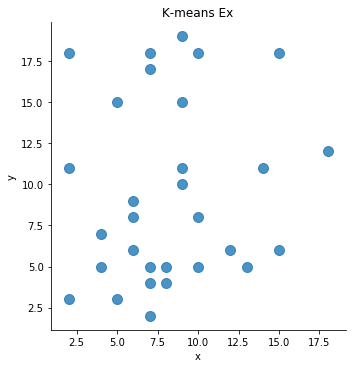

In [0]:
#데이터 시각화하기
sb .lmplot('x','y',data = df,fit_reg=False,scatter_kws={"s":100}) #마지막 시각화 점 크기
plt.title('K-means Ex')
plt.xlabel('x')
plt.ylabel('y')

In [0]:
points = df.values #data frame 값들을 numpy객체로 초기화
kmeans = KMeans(n_clusters=4).fit(points) #cluster수 4개
kmeans.cluster_centers_

array([[11.14285714,  7.28571429],
       [ 7.        , 17.14285714],
       [ 5.53846154,  5.53846154],
       [15.66666667, 13.66666667]])

In [0]:
kmeans.labels_

array([2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 3, 0, 3, 3], dtype=int32)

In [0]:
df['cluster']=kmeans.labels_ #cluster라는 속성을 만들고 각 클러스터의 ID값 넣어줌
df.head(30)

,x,y,cluster
0,2,3,2
1,2,11,2
2,2,18,1
3,4,5,2
4,4,7,2
5,5,3,2
6,5,15,1
7,6,6,2
8,6,8,2
9,6,9,2


Text(0.5, 1, 'k-means ex2')

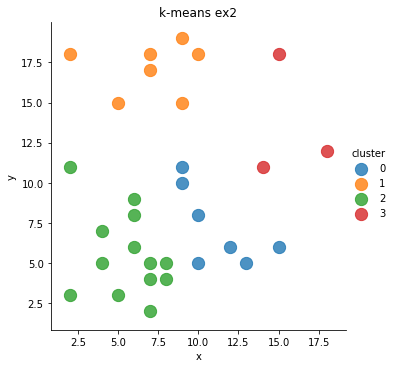

In [0]:
sb.lmplot('x','y',data=df,fit_reg=False,scatter_kws={"s":150},hue="cluster") #cluseter 속성 기준으로 분류
plt.title('k-means ex2')
